#### Tugas Besar Kecerdasan Buatan

# **Judul: Analisis Kesehatan Mental Menggunakan Metode Fuzzy Sugeno Dan Fuzzy Mamdani**
## **Khulika Malkan** (NIM 2311110057)
## **Rizal Wahyu Pratama** (NIM 2311110029)

In [ ]:
smmh = pd.read_csv('/content/smmh.csv')
smmh

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,2,3,3,2,2,3,4,4,5,4


In [ ]:
smmh.shape

(481, 21)

In [ ]:
smmh.columns

Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

### **Pre-processing Dataset**


In [ ]:
import pandas as pd

new_column_names = {
    'Timestamp': 'timestamp',
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship_status',
    '4. Occupation Status': 'occupation_status',
    '5. What type of organizations are you affiliated with?': 'affiliated_organizations',
    '6. Do you use social media?': 'use_social_media',
    '7. What social media platforms do you commonly use?': 'social_media_platforms',
    '8. What is the average time you spend on social media every day?': 'daily_social_media_time',
    '9. How often do you find yourself using Social media without a specific purpose?': 'frequency_social_media_no_purpose',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'restless_without_social_media',
    "11. Do you feel restless if you haven't used Social media in a while?": 'restless_without_social_media',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'distractibility_scale',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'worry_level_scale',
    '14. Do you find it difficult to concentrate on things?': 'difficulty_concentrating',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'compare_to_successful_people_scale',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'feelings_about_comparisons',
    '17. How often do you look to seek validation from features of social media?': 'frequency_seeking_validation',
    '18. How often do you feel depressed or down?': 'frequency_feeling_depressed',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'interest_fluctuation_scale',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'sleep_issues_scale',
}

smmh = smmh.rename(columns=new_column_names)

In [ ]:
smmh

,timestamp,age,gender,relationship_status,occupation_status,affiliated_organizations,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_no_purpose,...,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,compare_to_successful_people_scale,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,2,3,3,2,2,3,4,4,5,4


In [ ]:
# Mengonversi kolom 'daily_social_media_time' menjadi numerik
def convert_time_to_numeric(time_str):
    if 'Less than an Hour' in time_str:
        return 0.5
    elif 'Between 1 and 2 hours' in time_str:
        return 1.5
    elif 'Between 2 and 3 hours' in time_str:
        return 2.5
    elif 'Between 3 and 4 hours' in time_str:
        return 3.5
    elif 'More than 5 hours' in time_str:
        return 5.5
    else:
        return np.nan

smmh['daily_social_media_time'] = smmh['daily_social_media_time'].apply(convert_time_to_numeric)


In [ ]:
smmh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   timestamp                           481 non-null    object 
 1   age                                 481 non-null    float64
 2   gender                              481 non-null    object 
 3   relationship_status                 481 non-null    object 
 4   occupation_status                   481 non-null    object 
 5   affiliated_organizations            451 non-null    object 
 6   use_social_media                    481 non-null    object 
 7   social_media_platforms              481 non-null    object 
 8   daily_social_media_time             414 non-null    float64
 9   frequency_social_media_no_purpose   481 non-null    int64  
 10  restless_without_social_media       481 non-null    int64  
 11  restless_without_social_media       481 non-n

In [ ]:
smmh.isnull().sum()

,0
timestamp,0
age,0
gender,0
relationship_status,0
occupation_status,0
affiliated_organizations,30
use_social_media,0
social_media_platforms,0
daily_social_media_time,67
frequency_social_media_no_purpose,0


In [ ]:
mode_value = smmh['affiliated_organizations'].mode()[0]
smmh['affiliated_organizations'].fillna(mode_value, inplace=True)

<ipython-input-60-a72eea722824>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  smmh['affiliated_organizations'].fillna(mode_value, inplace=True)


In [ ]:
smmh.isnull().sum()

,0
timestamp,0
age,0
gender,0
relationship_status,0
occupation_status,0
affiliated_organizations,0
use_social_media,0
social_media_platforms,0
daily_social_media_time,67
frequency_social_media_no_purpose,0


In [ ]:
duplicate_rows = smmh[smmh.duplicated()]
duplicate_rows.sum()

,0
timestamp,0
age,0.0
gender,0
relationship_status,0
occupation_status,0
affiliated_organizations,0
use_social_media,0
social_media_platforms,0
daily_social_media_time,0.0
frequency_social_media_no_purpose,0


In [ ]:
smmh.columns

Index(['timestamp', 'age', 'gender', 'relationship_status',
       'occupation_status', 'affiliated_organizations', 'use_social_media',
       'social_media_platforms', 'daily_social_media_time',
       'frequency_social_media_no_purpose', 'restless_without_social_media',
       'restless_without_social_media', 'distractibility_scale',
       'worry_level_scale', 'difficulty_concentrating',
       'compare_to_successful_people_scale', 'feelings_about_comparisons',
       'frequency_seeking_validation', 'frequency_feeling_depressed',
       'interest_fluctuation_scale', 'sleep_issues_scale'],
      dtype='object')

In [ ]:
# Menghapus kolom yang tidak diperlukan
smmh.drop(columns=["timestamp"], inplace=True)

In [ ]:
# Menghapus baris dengan nilai yang hilang
smmh.dropna(inplace=True)

In [ ]:
smmh.T

,0,1,2,3,4,5,6,7,8,9,...,470,471,472,473,475,476,477,478,479,480
age,21.0,21.0,21.0,21.0,21.0,22.0,21.0,21.0,21.0,20.0,...,20.0,20.0,35.0,26.0,32.0,24.0,26.0,29.0,21.0,53.0
gender,Male,Female,Female,Female,Female,Female,Female,Female,Female,Male,...,Female,Female,Female,Female,Female,Male,Female,Female,Male,Male
relationship_status,In a relationship,Single,Single,Single,Single,Single,Married,In a relationship,In a relationship,Single,...,Single,Single,Married,Married,Married,Single,Married,Married,Single,Married
occupation_status,University Student,University Student,University Student,University Student,University Student,University Student,University Student,University Student,University Student,University Student,...,University Student,University Student,Salaried Worker,University Student,Salaried Worker,Salaried Worker,Salaried Worker,Salaried Worker,University Student,Salaried Worker
affiliated_organizations,University,University,University,University,University,University,University,University,University,University,...,Company,University,Company,University,Private,"University, Private",University,University,University,Private
use_social_media,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
social_media_platforms,"Facebook, Twitter, Instagram, YouTube, Discord...","Facebook, Twitter, Instagram, YouTube, Discord...","Facebook, Instagram, YouTube, Pinterest","Facebook, Instagram","Facebook, Instagram, YouTube","Facebook, Twitter, Instagram, YouTube, Discord...","Facebook, Instagram, YouTube, Snapchat, TikTok","Facebook, Instagram, YouTube","Facebook, Instagram, YouTube","Reddit, Pinterest",...,"Instagram, YouTube, Snapchat, Discord, Reddit,...","Facebook, Instagram, YouTube","Facebook, Instagram, YouTube","Facebook, YouTube, TikTok","Facebook, Instagram","Facebook, Instagram, YouTube","Facebook, YouTube","Facebook, YouTube","Facebook, Twitter, Instagram, YouTube, Discord...","Facebook, YouTube"
daily_social_media_time,2.5,5.5,3.5,5.5,2.5,2.5,3.5,5.5,5.5,0.5,...,1.5,5.5,1.5,2.5,3.5,2.5,1.5,2.5,2.5,0.5
frequency_social_media_no_purpose,5,4,3,4,3,4,4,5,5,1,...,2,5,3,4,5,3,2,3,2,2
restless_without_social_media,3,3,2,2,5,4,3,2,2,1,...,2,4,2,4,5,4,1,3,3,3


### **Metode Fuzzy Mamdani**
- **Input:** Waktu di media sosial dan keteralihan.
- **Output:** Tingkat depresi.
- **Fuzzy Rules:**
  1. Jika waktu di media sosial rendah dan keteralihan rendah, maka depresi rendah.
  2. Jika waktu di media sosial sedang dan keteralihan sedang, maka depresi sedang.
  3. Jika waktu di media sosial tinggi dan keteralihan tinggi, maka depresi tinggi.


In [ ]:
!pip install scikit-fuzzy

In [ ]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy import membership

In [ ]:
# Mengganti nama kolom untuk kemudahan
smmh.rename(columns={
    '1. What is your age?': 'usia',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'keteralihan',
    '18. How often do you feel depressed or down?': 'depresi'
}, inplace=True)

In [ ]:
smmh.rename

<bound method DataFrame.rename of       age  gender relationship_status   occupation_status  \
0    21.0    Male   In a relationship  University Student   
1    21.0  Female              Single  University Student   
2    21.0  Female              Single  University Student   
3    21.0  Female              Single  University Student   
4    21.0  Female              Single  University Student   
..    ...     ...                 ...                 ...   
476  24.0    Male              Single     Salaried Worker   
477  26.0  Female             Married     Salaried Worker   
478  29.0  Female             Married     Salaried Worker   
479  21.0    Male              Single  University Student   
480  53.0    Male             Married     Salaried Worker   

    affiliated_organizations use_social_media  \
0                 University              Yes   
1                 University              Yes   
2                 University              Yes   
3                 University              Yes   
4                 University              Yes   
..                       ...              ...   
476      University, Private              Yes   
477               University              Yes   
478               University              Yes   
479               University              Yes   
480                  Private              Yes   

                                social_media_platforms  \
0    Facebook, Twitter, Instagram, YouTube, Discord...   
1    Facebook, Twitter, Instagram, YouTube, Discord...   
2              Facebook, Instagram, YouTube, Pinterest   
3                                  Facebook, Instagram   
4                         Facebook, Instagram, YouTube   
..                                                 ...   
476                       Facebook, Instagram, YouTube   
477                                  Facebook, YouTube   
478                                  Facebook, YouTube   
479  Facebook, Twitter, Instagram, YouTube, Discord...   
480                                  Facebook, YouTube   

     daily_social_media_time  frequency_social_media_no_purpose  \
0                        2.5                                  5   
1                        5.5                                  4   
2                        3.5                                  3   
3                        5.5                                  4   
4                        2.5                                  3   
..                       ...                                ...   
476                      2.5                                  3   
477                      1.5                                  2   
478                      2.5                                  3   
479                      2.5                                  2   
480                      0.5                                  2   

     restless_without_social_media  restless_without_social_media  \
0                                3                              2   
1                                3                              2   
2                                2                              1   
3                                2                              1   
4                                5                              4   
..                             ...                            ...   
476                              4                              3   
477                              1                              2   
478                              3                              4   
479                              3                              2   
480                              3                              1   

     distractibility_scale  worry_level_scale  difficulty_concentrating  \
0                        5                  2                         5   
1                        4                  5                         4   
2                        2                  5                         4   
3            

In [ ]:
# Mengambil data yang relevan
usia = smmh['age'].values
keteralihan = smmh['distractibility_scale'].values
depresi = smmh['frequency_feeling_depressed'].values

In [ ]:
# Mendefinisikan variabel fuzzy dengan rentang yang sama
usia_fuzzy_mamdani = np.arange(0, 6, 1)  # Rentang yang sama dengan keteralihan dan depresi
keteralihan_fuzzy_mamdani = np.arange(0, 6, 1)
depresi_fuzzy_mamdani = np.arange(0, 6, 1)

### Fungsi Keanggotaan
- **Usia:**
  - Muda: Usia 0-30 tahun
  - Dewasa: Usia 20-60 tahun
  - Tua: Usia 50-100 tahun

In [ ]:
# Fungsi keanggotaan untuk usia
usia_muda = fuzz.trimf(usia_fuzzy_mamdani, [0, 0, 25])
usia_dewasa = fuzz.trimf(usia_fuzzy_mamdani, [20, 40, 60])
usia_tua = fuzz.trimf(usia_fuzzy_mamdani, [50, 100, 100])

### Batas Nilai Linguistik
- **Keteralihan:**
  - Rendah: 1-2
  - Sedang: 3
  - Tinggi: 4-5

In [ ]:
# Fungsi keanggotaan untuk keteralihan
keteralihan_rendah = fuzz.trimf(keteralihan_fuzzy_mamdani, [0, 0, 2])
keteralihan_sedang = fuzz.trimf(keteralihan_fuzzy_mamdani, [1, 3, 5])
keteralihan_tinggi = fuzz.trimf(keteralihan_fuzzy_mamdani, [4, 5, 5])

In [ ]:
# Fungsi keanggotaan untuk depresi
depresi_rendah = fuzz.trimf(depresi_fuzzy_mamdani, [0, 0, 2])
depresi_sedang = fuzz.trimf(depresi_fuzzy_mamdani, [1, 3, 5])
depresi_tinggi = fuzz.trimf(depresi_fuzzy_mamdani, [4, 5, 5])

In [ ]:
# Aturan fuzzy
rule1 = np.fmin(usia_muda, keteralihan_rendah)
rule2 = np.fmin(usia_dewasa, keteralihan_sedang)
rule3 = np.fmin(usia_tua, keteralihan_tinggi)

In [ ]:
# Menghitung output fuzzy untuk depresi
depresi_output_rendah = np.fmax(rule1, rule2)
depresi_output_sedang = rule2
depresi_output_tinggi = rule3

# Defuzzifikasi
depresi_result = fuzz.defuzz(depresi_fuzzy_mamdani,
                              np.fmax(depresi_output_rendah,
                                       np.fmax(depresi_output_sedang, depresi_output_tinggi)),
                              'centroid')

In [ ]:
# Menampilkan hasil
print(f'Nilai crisp untuk tingkat depresi mamdani: {depresi_result}')

Nilai crisp untuk tingkat depresi mamdani: 0.6666666666666666


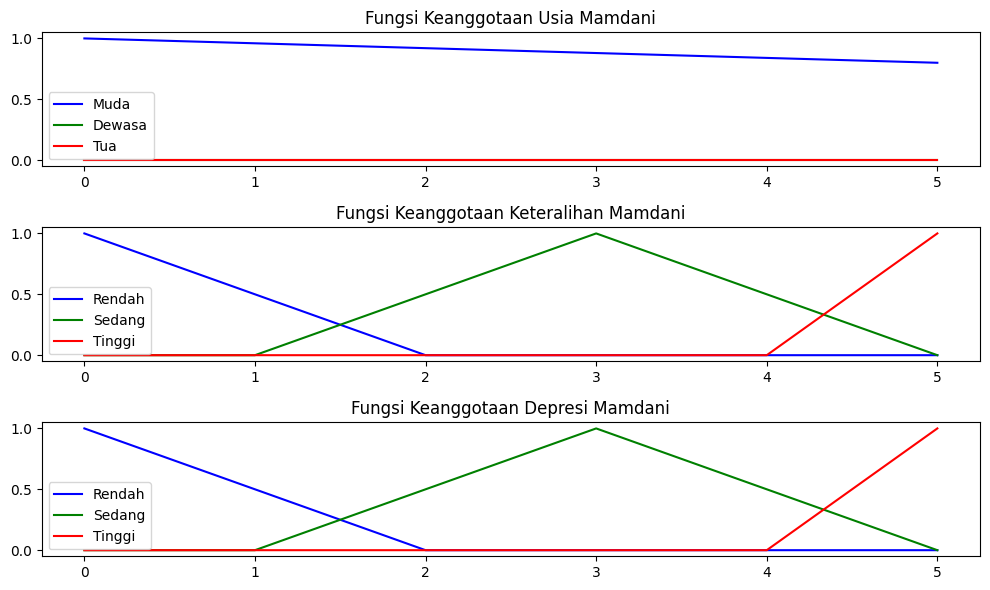

In [ ]:
# Visualisasi
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(usia_fuzzy_mamdani, usia_muda, 'b', label='Muda')
plt.plot(usia_fuzzy_mamdani, usia_dewasa, 'g', label='Dewasa')
plt.plot(usia_fuzzy_mamdani, usia_tua, 'r', label='Tua')
plt.title('Fungsi Keanggotaan Usia Mamdani')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(keteralihan_fuzzy_mamdani, keteralihan_rendah, 'b', label='Rendah')
plt.plot(keteralihan_fuzzy_mamdani, keteralihan_sedang, 'g', label='Sedang')
plt.plot(keteralihan_fuzzy_mamdani, keteralihan_tinggi, 'r', label='Tinggi')
plt.title('Fungsi Keanggotaan Keteralihan Mamdani')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(depresi_fuzzy_mamdani, depresi_rendah, 'b', label='Rendah')
plt.plot(depresi_fuzzy_mamdani, depresi_sedang, 'g', label='Sedang')
plt.plot(depresi_fuzzy_mamdani, depresi_tinggi, 'r', label='Tinggi')
plt.title('Fungsi Keanggotaan Depresi Mamdani')
plt.legend()

plt.tight_layout()
plt.show()

### **Metode Fuzzy Sugeno**
- **Input:** Waktu di media sosial dan keteralihan.
- **Output:** Tingkat depresi.
- **Fuzzy Rules:**
  1. Jika waktu di media sosial rendah dan keteralihan rendah, maka depresi rendah.
  2. Jika waktu di media sosial sedang dan keteralihan sedang, maka depresi sedang.
  3. Jika waktu di media sosial tinggi dan keteralihan tinggi, maka depresi tinggi.

In [ ]:
# Mengambil data yang relevan
usia = smmh['age'].values
keteralihan = smmh['distractibility_scale'].values

In [ ]:
# Mendefinisikan variabel fuzzy dengan rentang yang sama
usia_fuzzy_sugeno = np.arange(0, 6, 1)  # Rentang yang sama dengan keteralihan dan depresi
keteralihan_fuzzy_sugeno = np.arange(0, 6, 1)
depresi_fuzzy_sugeno = np.arange(0, 6, 1)

In [ ]:
# Fungsi keanggotaan untuk usia
usia_muda = fuzz.trimf(usia_fuzzy_sugeno, [0, 0, 2.5]) # Adjust the universe of discourse to match keteralihan_fuzzy
usia_dewasa = fuzz.trimf(usia_fuzzy_sugeno, [2, 4, 6]) # Adjust the universe of discourse to match keteralihan_fuzzy
usia_tua = fuzz.trimf(usia_fuzzy_sugeno, [5, 6, 6]) # Adjust the universe of discourse to match keteralihan_fuzzy

In [ ]:
# Fungsi keanggotaan untuk keteralihan
keteralihan_rendah = fuzz.trimf(keteralihan_fuzzy_sugeno, [0, 0, 2])
keteralihan_sedang = fuzz.trimf(keteralihan_fuzzy_sugeno, [1, 3, 5])
keteralihan_tinggi = fuzz.trimf(keteralihan_fuzzy_sugeno, [4, 5, 5])

### Aturan fuzzy untuk Sugeno
- **Misalkan output depresi adalah nilai konstan berdasarkan aturan:**
  - Aturan: Jika usia muda dan keteralihan rendah, maka depresi rendah
  - Aturan: Jika usia dewasa dan keteralihan sedang, maka depresi sedang
  - Aturan: Jika usia tua dan keteralihan tinggi, maka depresi tinggi

In [ ]:
# Output untuk setiap aturan
output_depresi_sugeno = np.array([1, 3, 5])  # Nilai output untuk depresi

In [ ]:
# Menghitung derajat keanggotaan untuk setiap aturan
rule1 = np.fmin(usia_muda, keteralihan_rendah)
rule2 = np.fmin(usia_dewasa, keteralihan_sedang)
rule3 = np.fmin(usia_tua, keteralihan_tinggi)

In [ ]:
# Menghitung output menggunakan metode Sugeno
output = (rule1 * output_depresi_sugeno[0] + rule2 * output_depresi_sugeno[1] + rule3 * output_depresi_sugeno[2]) / (rule1 + rule2 + rule3)

<ipython-input-93-2350a214a7a5>:2: RuntimeWarning: invalid value encountered in divide
  output = (rule1 * output_depresi_sugeno[0] + rule2 * output_depresi_sugeno[1] + rule3 * output_depresi_sugeno[2]) / (rule1 + rule2 + rule3)


In [ ]:
# Menampilkan hasil
print(f'Nilai crisp untuk tingkat depresi sugeno: {output}')

Nilai crisp untuk tingkat depresi sugeno: [ 1.  1. nan  3.  3. nan]


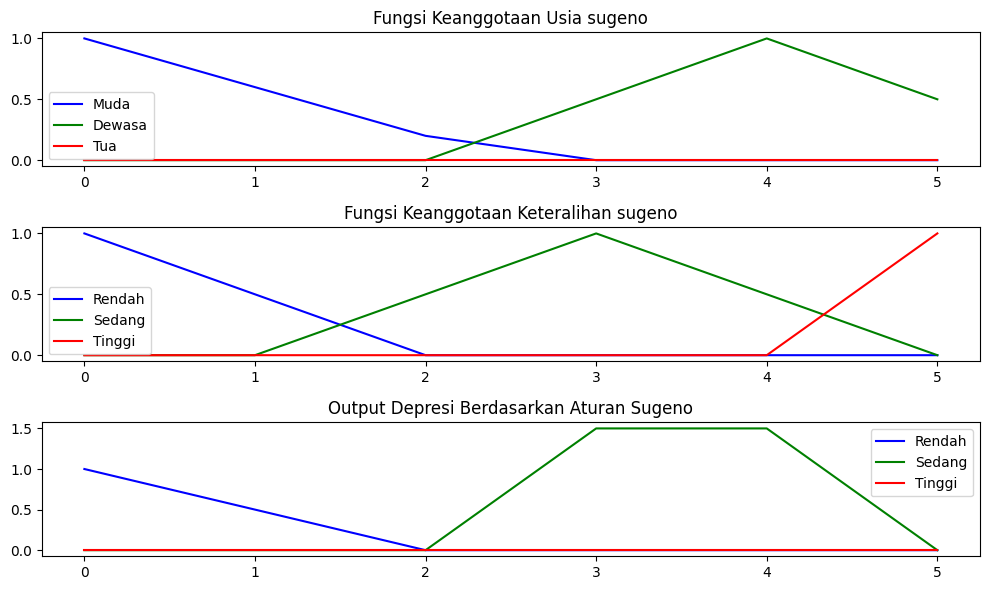

In [ ]:
# Visualisasi
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(usia_fuzzy_sugeno, usia_muda, 'b', label='Muda')
plt.plot(usia_fuzzy_sugeno, usia_dewasa, 'g', label='Dewasa')
plt.plot(usia_fuzzy_sugeno, usia_tua, 'r', label='Tua')
plt.title('Fungsi Keanggotaan Usia sugeno')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(keteralihan_fuzzy_sugeno, keteralihan_rendah, 'b', label='Rendah')
plt.plot(keteralihan_fuzzy_sugeno, keteralihan_sedang, 'g', label='Sedang')
plt.plot(keteralihan_fuzzy_sugeno, keteralihan_tinggi, 'r', label='Tinggi')
plt.title('Fungsi Keanggotaan Keteralihan sugeno')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(depresi_fuzzy, output_depresi_sugeno[0] * rule1, 'b', label='Rendah')
plt.plot(depresi_fuzzy, output_depresi_sugeno[1] * rule2, 'g', label='Sedang')
plt.plot(depresi_fuzzy, output_depresi_sugeno[2] * rule3, 'r', label='Tinggi')
plt.title('Output Depresi Berdasarkan Aturan Sugeno')
plt.legend()

plt.tight_layout()
plt.show()

nilai

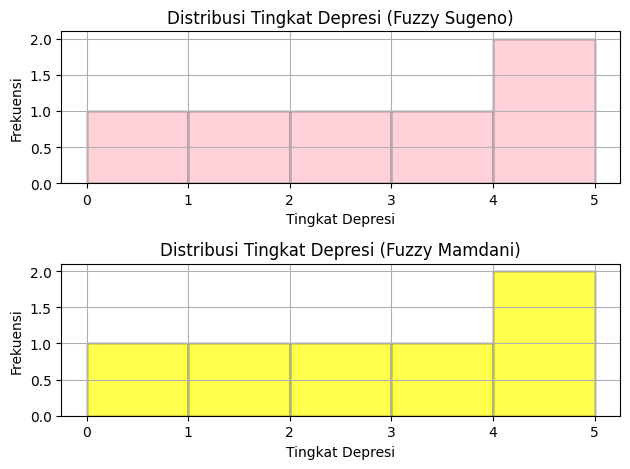

In [ ]:
# Grafik distribusi tingkat depresi untuk Fuzzy Sugeno
plt.subplot(2, 1, 1)
plt.hist(depresi_fuzzy_sugeno, bins=5, alpha=0.7, color='pink', edgecolor='black')
plt.title('Distribusi Tingkat Depresi (Fuzzy Sugeno)')
plt.xlabel('Tingkat Depresi')
plt.ylabel('Frekuensi')
plt.grid()

# Grafik distribusi tingkat depresi untuk Fuzzy Mamdani
plt.subplot(2, 1, 2)
plt.hist(depresi_fuzzy_mamdani, bins=5, alpha=0.7, color='yellow', edgecolor='black')
plt.title('Distribusi Tingkat Depresi (Fuzzy Mamdani)')
plt.xlabel('Tingkat Depresi')
plt.ylabel('Frekuensi')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
# Definisi variabel fuzzy untuk Fuzzy Sugeno
# Input
social_media_time = smmh['daily_social_media_time'].values
easily_distracted = smmh['distractibility_scale'].values

# Output
depression = np.zeros(len(smmh))
depression

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
# Fungsi keanggotaan untuk Fuzzy Sugeno
# Waktu di Media Sosial
x_social_media = np.arange(0, 1.1, 0.1)
low = fuzz.trimf(x_social_media, [0, 0, 0.3])
medium = fuzz.trimf(x_social_media, [0.2, 0.5, 0.8])
high = fuzz.trimf(x_social_media, [0.7, 1, 1])

In [ ]:
# Keteralihan
x_distracted = np.arange(1, 6, 1)
low_distracted = fuzz.trimf(x_distracted, [1, 1, 2])
medium_distracted = fuzz.trimf(x_distracted, [2, 3, 4])
high_distracted = fuzz.trimf(x_distracted, [4, 5, 5])

In [ ]:
# Aturan Fuzzy untuk Sugeno
for i in range(len(smmh)):
    # Derajat keanggotaan
    social_low = fuzz.interp_membership(x_social_media, low, social_media_time[i])
    social_medium = fuzz.interp_membership(x_social_media, medium, social_media_time[i])
    social_high = fuzz.interp_membership(x_social_media, high, social_media_time[i])

    distracted_low = fuzz.interp_membership(x_distracted, low_distracted, easily_distracted[i])
    distracted_medium = fuzz.interp_membership(x_distracted, medium_distracted, easily_distracted[i])
    distracted_high = fuzz.interp_membership(x_distracted, high_distracted, easily_distracted[i])

    # Menghitung output menggunakan aturan
    depression[i] = (social_low * distracted_low * 1 +
                     social_medium * distracted_medium * 3 +
                     social_high * distracted_high * 5) / (
                     social_low * distracted_low +
                     social_medium * distracted_medium +
                     social_high * distracted_high)

<ipython-input-116-a739bc8c0a4d>:13: RuntimeWarning: invalid value encountered in scalar divide
  depression[i] = (social_low * distracted_low * 1 +


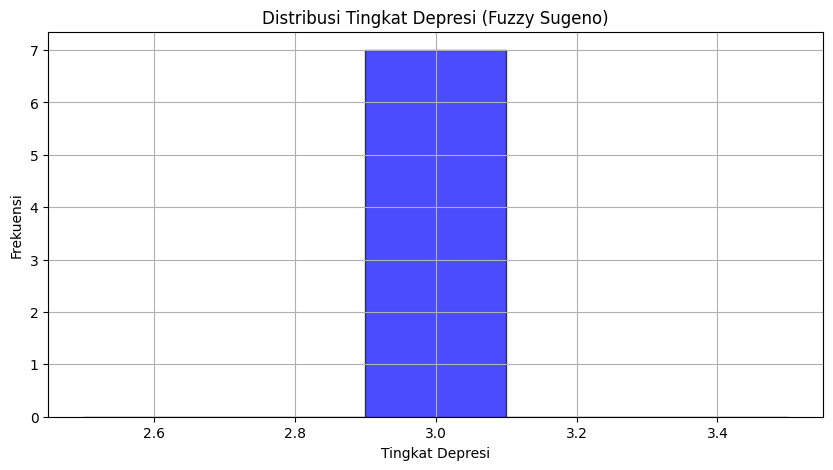

In [ ]:
# Visualisasi Hasil Fuzzy Sugeno
plt.figure(figsize=(10, 5))
plt.hist(depression, bins=5, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribusi Tingkat Depresi (Fuzzy Sugeno)')
plt.xlabel('Tingkat Depresi')
plt.ylabel('Frekuensi')
plt.grid()
plt.show()

In [ ]:
# Definisi variabel fuzzy untuk Fuzzy Mamdani
# Output untuk Mamdani
depression_mamdani = np.zeros(len(smmh))

In [ ]:
# Aturan Fuzzy untuk Mamdani
for i in range(len(smmh)):
    # Derajat keanggotaan
    social_low = fuzz.interp_membership(x_social_media, low, social_media_time[i])
    social_medium = fuzz.interp_membership(x_social_media, medium, social_media_time[i])
    social_high = fuzz.interp_membership(x_social_media, high, social_media_time[i])

    distracted_low = fuzz.interp_membership(x_distracted, low_distracted, easily_distracted[i])
    distracted_medium = fuzz.interp_membership(x_distracted, medium_distracted, easily_distracted[i])
    distracted_high = fuzz.interp_membership(x_distracted, high_distracted, easily_distracted[i])

    # Menghitung output fuzzy
    depression_mamdani[i] = np.fmax(np.fmax(
        np.fmin(social_low, distracted_low),
        np.fmin(social_medium, distracted_medium)),
        np.fmin(social_high, distracted_high))

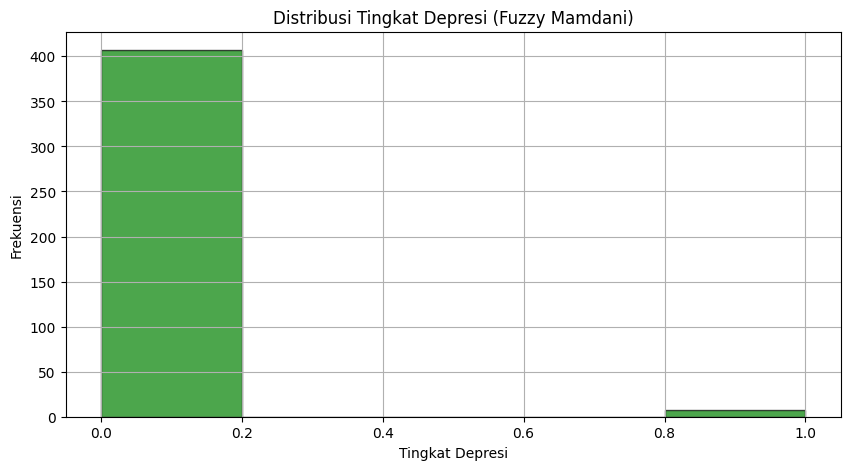

In [ ]:
# Visualisasi Hasil Fuzzy Mamdani
plt.figure(figsize=(10, 5))
plt.hist(depression_mamdani, bins=5, alpha=0.7, color='green', edgecolor='black')
plt.title('Distribusi Tingkat Depresi (Fuzzy Mamdani)')
plt.xlabel('Tingkat Depresi')
plt.ylabel('Frekuensi')
plt.grid()
plt.show()